In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [2]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()
dataset = pd.read_csv(os.path.join(repo_root, 'ourdata', 'dataset_session_799864342.csv'))

In [3]:
dataset

,stimulus_presentation_id,unit_id,temporal_frequency,orientation,spikes_per_second,area
0,3798,951087020,4.0,135.0,9.991457,CA1
1,3798,951087105,4.0,135.0,19.483342,CA1
2,3798,951087261,4.0,135.0,5.495302,CA1
3,3798,951087291,4.0,135.0,11.490176,CA1
4,3798,951087330,4.0,135.0,0.999146,CA1
...,...,...,...,...,...,...
321784,49432,951108207,8.0,0.0,3.996663,VISrl
321785,49432,951108231,8.0,0.0,2.997497,VISrl
321786,49432,951108474,8.0,0.0,5.495411,CA1
321787,49432,951108512,8.0,0.0,1.498749,VISrl


In [4]:
dataset['area'].unique()

array(['CA1', 'VISam', 'LP', 'DG', 'VISmma', 'ProS', 'SUB', 'VISp', 'CA3',
       'CA2', 'VISl', 'LGd', 'VISal', 'APN', 'POL', 'VISrl'], dtype=object)

In [5]:
# dataset['area'] = dataset['area'].apply(lambda x: 
#     'Visual' if x in ['VISp', 'VISal', 'VISmma', 'VISrl', 'VISam', 'VISl'] else 
#     'Hippocampus' if x in ['CA1', 'CA2', 'CA3', 'DG', 'SUB', 'ProS'] else 
#     'Thalamus' if x in ['LP', 'LGd', 'POL', 'APN'] else 
#     'Other') 

In [6]:
#we drop the rows with nans
dataset = dataset.dropna()
print(dataset.shape[0])

306986


In [7]:
#we filter for neurons that are spiking
dataset = dataset[dataset['spikes_per_second'] > 50]
dataset

,stimulus_presentation_id,unit_id,temporal_frequency,orientation,spikes_per_second,area
14,3798,951087824,4.0,135.0,62.946181,VISam
83,3798,951091368,4.0,135.0,57.950452,VISmma
107,3798,951092027,4.0,135.0,80.431231,VISmma
146,3798,951094542,4.0,135.0,50.956432,ProS
178,3798,951095400,4.0,135.0,74.935930,VISp
...,...,...,...,...,...,...
321621,49432,951101943,8.0,0.0,59.949942,LGd
321634,49432,951102227,8.0,0.0,79.933256,LGd
321725,49432,951105553,8.0,0.0,63.447022,APN
321732,49432,951105899,8.0,0.0,72.939096,POL


we now try to do 2 algorithm of unsupervised learning, KMeans and DBSCAN, to cluster the data.

In [8]:
#dataset = dataset.sample(22000, random_state=42)

In [9]:
# Load dataset (assuming it's already in a DataFrame called 'dataset')
features = ['temporal_frequency', 'orientation']
X = dataset[features]
Y = dataset['area']  

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

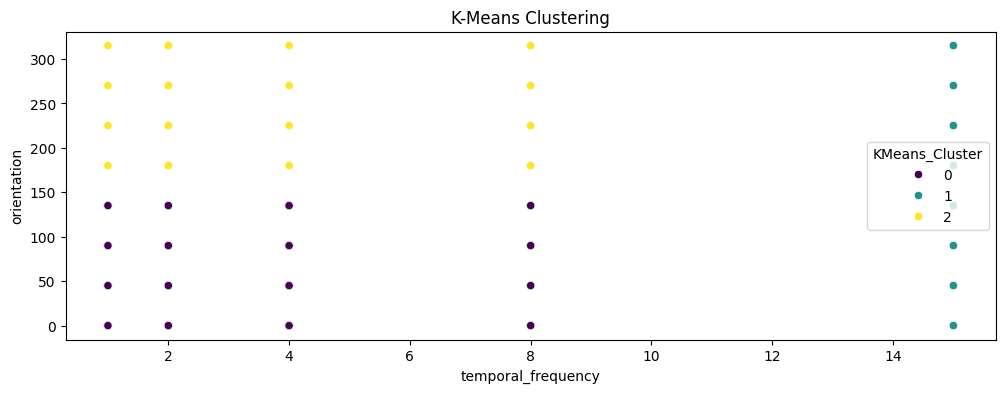

In [10]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

dataset['KMeans_Cluster'] = kmeans_labels

# Visualize K-Means Clusters
plt.figure(figsize=(12, 4))
sns.scatterplot(x=dataset['temporal_frequency'], y=dataset['orientation'], hue=dataset['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

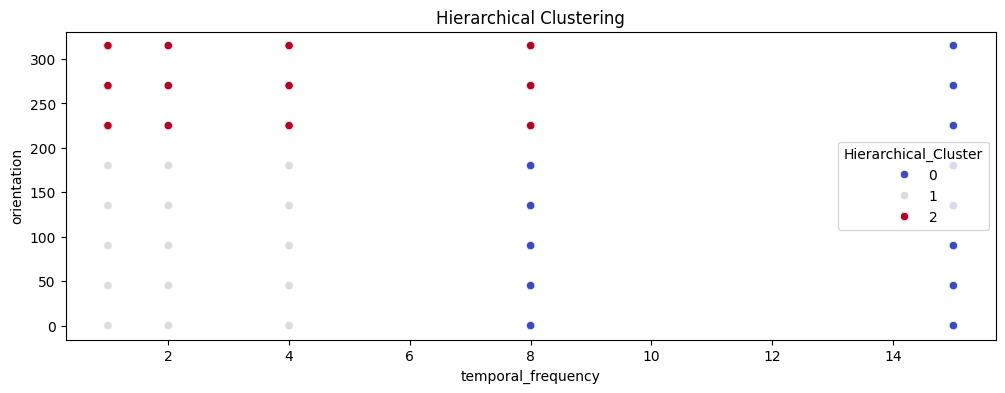

In [11]:
# Apply Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
dataset['Hierarchical_Cluster'] = agglo_labels

# Visualize Hierarchical Clusters
plt.figure(figsize=(12, 4))
sns.scatterplot(x=dataset['temporal_frequency'], y=dataset['orientation'], hue=dataset['Hierarchical_Cluster'], palette='coolwarm')
plt.title('Hierarchical Clustering')
plt.show()


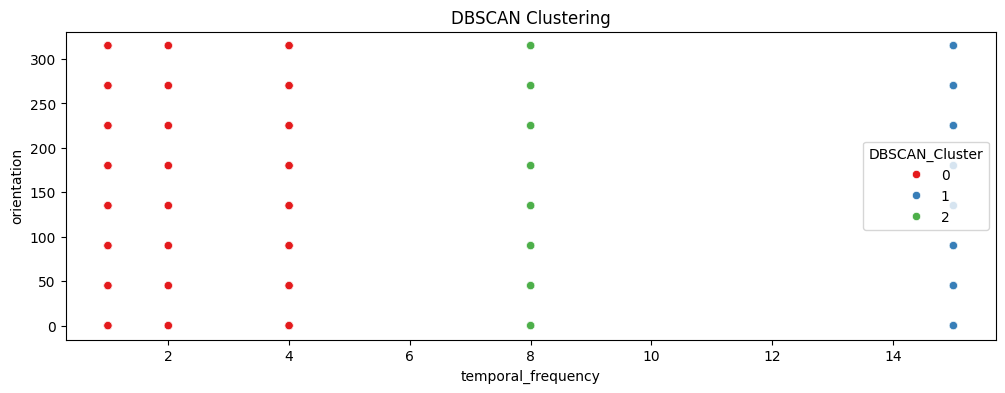

In [12]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dataset['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN Clusters
plt.figure(figsize=(12, 4))
sns.scatterplot(x=dataset['temporal_frequency'], y=dataset['orientation'], hue=dataset['DBSCAN_Cluster'], palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()

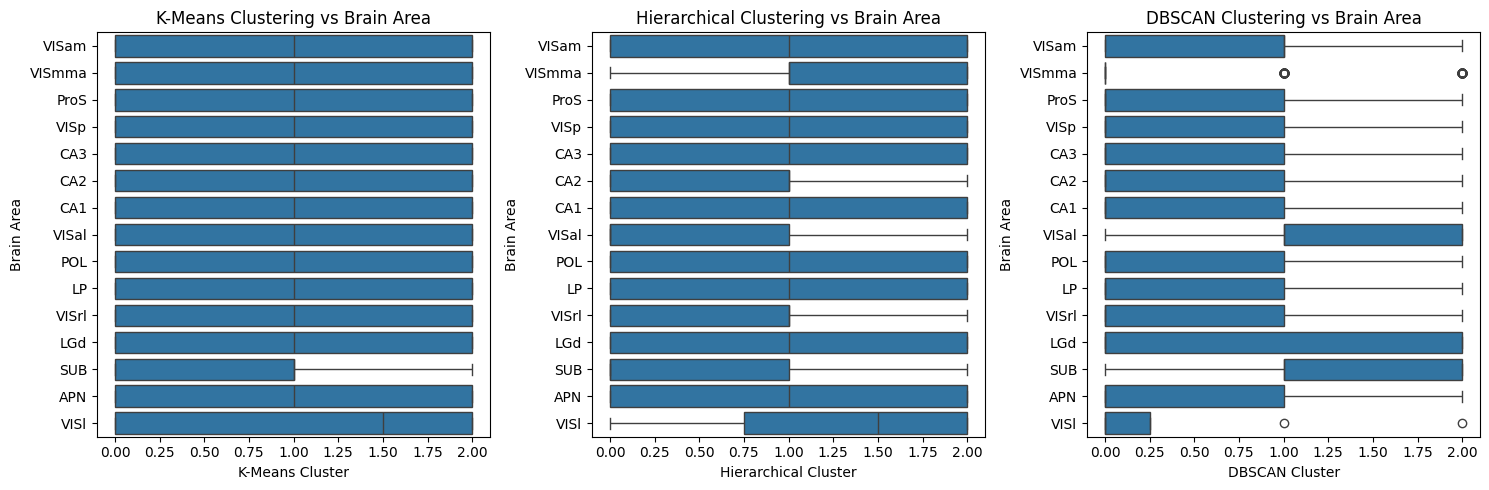

In [13]:
plt.figure(figsize=(15, 5))

# Plot for K-Means Clustering
plt.subplot(1, 3, 1)
sns.boxplot(x='KMeans_Cluster', y='area', data=dataset)
plt.title('K-Means Clustering vs Brain Area')
plt.xlabel('K-Means Cluster')
plt.ylabel('Brain Area')

# Plot for Hierarchical Clustering
plt.subplot(1, 3, 2)
sns.boxplot(x='Hierarchical_Cluster', y='area', data=dataset)
plt.title('Hierarchical Clustering vs Brain Area')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Brain Area')

# Plot for DBSCAN Clustering
plt.subplot(1, 3, 3)
sns.boxplot(x='DBSCAN_Cluster', y='area', data=dataset)
plt.title('DBSCAN Clustering vs Brain Area')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Brain Area')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [14]:
# Split data into training and testing sets
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, Y_train)

# Make predictions
Y_pred = xgb_model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.18      0.56      0.27       153
           2       0.00      0.00      0.00         9
           3       0.10      0.06      0.07       135
           4       0.00      0.00      0.00       114
           5       0.22      0.31      0.26       169
           6       0.00      0.00      0.00       106
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        23
          12       0.19      0.39      0.26       101
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        73

    accuracy                           0.19       989
   macro avg       0.05      0.09      0.06       989
weighted avg       0.10      0.19      0.12       989



/opt/anaconda3/envs/envallen/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/envallen/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/envallen/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

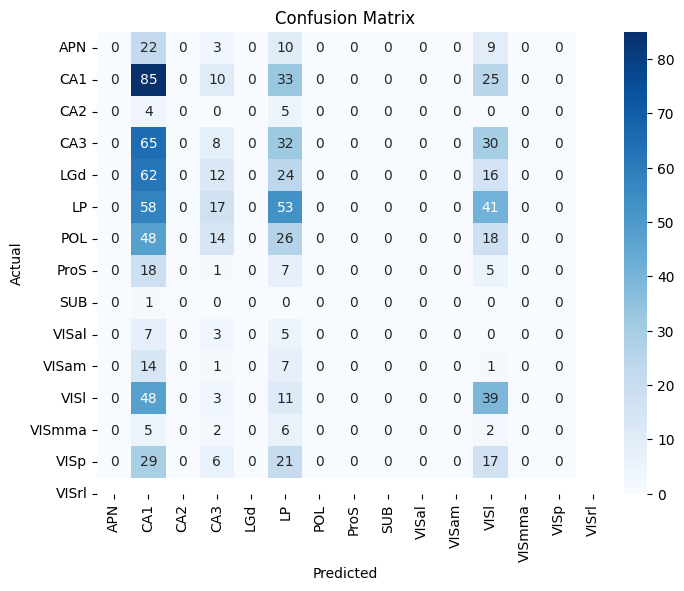

Accuracy: 0.1871


In [15]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display classification report
print("Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
print(f'Accuracy: {accuracy:.4f}')

# Compute ROC-AUC score if binary classification
if len(label_encoder.classes_) == 2:
    auc_score = roc_auc_score(Y_test, Y_pred)
    print(f'ROC-AUC Score: {auc_score:.4f}')